This Jupyter Notebook was created by Timm Pankratz, Lavinia Stiliadou and Sharon-Naemi Stiliadou as part of the project "Evaluation of characteristics of clustered circuits". The implementation of the expressibility of Sim was used (see https://github.com/bagmk/Quantum_Machine_Learning_Express) and adapted for clustered quantum circuits. Additionally, this notebook enables the evaluation of entanglement capability of these circuits.

In [53]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt

from scipy.special import rel_entr

from random import seed
from random import random
import cmath
import os

from qiskit.circuit import Parameter

In [54]:
# Specify the number of qubits, i.e. the width of the clustered_circuit
number_qubits = 8

In [55]:
#Possible Bin
bins_list=[];
for i in range(76):
    bins_list.append((i)/75)
#Center of the Bean
bins_x=[]    
for i in range(75):
    bins_x.append(bins_list[1]+bins_list[i])
def P_haar(l,u,N):
    return (1-l)**(N-1)-(1-u)**(N-1)
#Haar historgram
P_haar_hist=[]
for i in range(75):
    P_haar_hist.append(P_haar(bins_list[i],bins_list[i+1],pow(2, number_qubits)))
    
#Imaginary    
j=(-1)**(1/2)

In [56]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from math import pi



def circuit1(qc,qr,theta,L,repeat):
    #circuit 1 
    #theta is list of the parameters
    #theta length is 8L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    
    if repeat!=0:  

        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
     
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
    return qc


def circuit2(qc,qr,theta,L,repeat):
    #circuit 2
    #theta is list of the parameters
    #theta length is 8L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.cx(qr[3],qr[2])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[0])
    
    
    if repeat!=0:    
        
        qc.cx(qr[1],qr[0])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[3],qr[2])
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1         
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1                
     
    return qc




def circuit3(qc,qr,theta,L,repeat):
    #circuit 3
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:           
        
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1         
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1                
     
    return qc



def circuit4(qc,qr,theta,L,repeat):
    #circuit 4
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat
    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:               
        
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1         
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1                
     
    return qc




def circuit5(qc,qr,theta,L,repeat):
    #circuit 5
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crz(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             

        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1     
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        

        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crz(theta[count],qr[j],qr[i])
                    count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1         
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1                
     
    return qc



def circuit6(qc,qr,theta,L,repeat):
    #circuit 6
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crx(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        

        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1     
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        

        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crx(theta[count],qr[j],qr[i])
                    count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1         
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1                
     
    return qc


def circuit7(qc,qr,theta,L,repeat):
    #circuit 7
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1

        qc.crz(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crz(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        
        qc.crz(theta[count],qr[2],qr[1])    
        count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1        
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
                
        
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1
        
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1
        
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1         
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1                
     
    return qc



def circuit8(qc,qr,theta,L,repeat):
    #circuit 8
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1

        qc.crx(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crx(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.crx(theta[count],qr[2],qr[1])    
        count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1        
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
                
        
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1
        
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1
        
        
        
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1         
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1                
     
    return qc


def circuit9(qc,qr,theta,L,repeat):
    #circuit 9
    #theta is list of the parameters
    #theta length is (4)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.h(qr[i])

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
            
    if repeat!=0:             
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
                
        qc.cz(qr[1],qr[0]) 
        qc.cz(qr[2],qr[1])
        qc.cz(qr[3],qr[2])
            
                 
        
        for i in range(4):
            qc.h(qr[i])                  
     
    return qc







def circuit10(qc,qr,theta,L,repeat):
    #circuit 10
    #theta is list of the parameters
    #theta length is (4)L+4
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    
    for i in range(4):
        qc.ry(theta[count],qr[i])
        count=count+1
    
    for l in range(L):

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[0])



        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        
            
    if repeat!=0:             
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
        qc.cz(qr[3],qr[0])            
        qc.cz(qr[1],qr[0])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[3],qr[2])
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
                 
              
     
    return qc




def circuit11(qc,qr,theta,L,repeat):
    #circuit 11
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cx(qr[1],qr[0])
        qc.cx(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cx(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.cx(qr[2],qr[1])
            
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.ry(theta[count],qr[1])
        count=count+1 
        
        qc.cx(qr[3],qr[2])
        qc.cx(qr[1],qr[0])
            
            
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1               
     
    return qc

def circuit12(qc,qr,theta,L,repeat):
    #circuit 12
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cz(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.cz(qr[2],qr[1])
            
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.ry(theta[count],qr[1])
        count=count+1 
        
        qc.cz(qr[3],qr[2])
        qc.cz(qr[1],qr[0])
            
            
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1              
              
     
    return qc



def circuit13(qc,qr,theta,L,repeat):
    #circuit 13
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crz(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
         
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1                  
        qc.crz(theta[count],qr[0],qr[3])
        count=count+1 
        
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1         
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    

        qc.crz(theta[count],qr[0],qr[1])
        count=count+1           
            
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1         
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1 
        
        qc.crz(theta[count],qr[3],qr[0])
        count=count+1         
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
            
    return qc




def circuit14(qc,qr,theta,L,repeat):
    #circuit 14
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crx(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
         
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1                  
        qc.crx(theta[count],qr[0],qr[3])
        count=count+1 
        
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1         
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    

        qc.crx(theta[count],qr[0],qr[1])
        count=count+1           
            
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1         
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1 
        
        qc.crx(theta[count],qr[3],qr[0])
        count=count+1         
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
            
    return qc



def circuit15(qc,qr,theta,L,repeat):
    #circuit 15
    #theta is list of the parameters
    #theta length is (8)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.cx(qr[3],qr[0])

        qc.cx(qr[2],qr[3])

        qc.cx(qr[1],qr[2])

        qc.cx(qr[0],qr[1])





        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.cx(qr[3],qr[2])

        qc.cx(qr[0],qr[3])

        qc.cx(qr[1],qr[0])

        qc.cx(qr[2],qr[1])
            
    if repeat!=0:             
         
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[0])
        qc.cx(qr[0],qr[3])

        
        qc.cx(qr[3],qr[2])
      
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    

        qc.cx(qr[0],qr[1])
             
        qc.cx(qr[1],qr[2])
      
        qc.cx(qr[2],qr[3])

        
        qc.cx(qr[3],qr[0])
     
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
            
    return qc




def circuit16(qc,qr,theta,L,repeat):
    #circuit 16
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crz(theta[count],qr[1],qr[0])
        count=count+1
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             

        qc.crz(theta[count],qr[2],qr[1])
        count=count+1            
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1

        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1

    return qc


    
def circuit17(qc,qr,theta,L,repeat):
    #circuit 17
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crx(theta[count],qr[1],qr[0])
        count=count+1
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
         

        qc.crx(theta[count],qr[2],qr[1])
        count=count+1            
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1

        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1

    return qc

def circuit18(qc,qr,theta,L,repeat):
    #circuit 18
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crz(theta[count],qr[3],qr[0])
        count=count+1
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
         

        qc.crz(theta[count],qr[0],qr[1])
        count=count+1          
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1

        qc.crz(theta[count],qr[3],qr[0])
        count=count+1       

        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1

    return qc



def circuit19(qc,qr,theta,L,repeat):
    #circuit 1
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crx(theta[count],qr[3],qr[0])
        count=count+1
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:          
         
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1          
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1

        qc.crx(theta[count],qr[3],qr[0])
        count=count+1       

        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1

    return qc

In [57]:
# generate a clustered circuit out of the partitioned circuits 
def generate_clustered_circuit(circuits, reversed_circuits, arrangement, strategy, interactiontype, parameters, frequency_strategy):
    if len(circuits) > 0:
        circuit1 = circuits[0]
        circuit2 = circuits[1]
    if len(circuits) == 3:
        circuit3 = circuits[2]
    if len(circuits) == 4:
        circuit4 = circuits[3]
    
    # default is a circuit of width 8
    qr = QuantumRegister(8)
    if arrangement.__contains__("width12"):
        qr = QuantumRegister(12)

    clustered_circuit = QuantumCircuit(qr)
    
    if arrangement == "width8-partition2":
        clustered_circuit.compose(circuit1, qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(circuit2, qubits=[4, 5, 6, 7], inplace=True)
    if arrangement == "width12-partition3":
        clustered_circuit.compose(circuit1, qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(circuit2, qubits=[4, 5, 6, 7], inplace=True)
        clustered_circuit.compose(circuit3, qubits=[8, 9, 10, 11], inplace=True)
    if arrangement == "width8-partition3":
        clustered_circuit.compose(circuit1, qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(circuit2, qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(circuit3, qubits=[4, 5, 6, 7], inplace=True)
    if arrangement == "width8-partition4":
        clustered_circuit.compose(circuit1, qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(circuit2, qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(circuit3, qubits=[4, 5, 6, 7], inplace=True)
        clustered_circuit.compose(circuit4, qubits=[4, 5, 6, 7], inplace=True)
    
    for i in range(frequency_strategy):
        add_strategy_with_interactiontype(strategy, interactiontype, clustered_circuit, qr, parameters)
    # visually separate the circuit and the reversed circuit
    clustered_circuit.barrier()
    for i in range(frequency_strategy):
        add_reverse_strategy_with_interactiontype(strategy, interactiontype, clustered_circuit, qr, parameters)
        
    if arrangement == "width8-partition2":
        clustered_circuit.compose(reversed_circuits[0], qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(reversed_circuits[1], qubits=[4, 5, 6, 7], inplace=True)
    if arrangement == "width12-partition3":
        clustered_circuit.compose(reversed_circuits[0], qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(reversed_circuits[1], qubits=[4, 5, 6, 7], inplace=True)
        clustered_circuit.compose(reversed_circuits[2], qubits=[8, 9, 10, 11], inplace=True)
    if arrangement == "width8-partition3":
        clustered_circuit.compose(reversed_circuits[2], qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(reversed_circuits[1], qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(reversed_circuits[0], qubits=[4, 5, 6, 7], inplace=True)
    if arrangement == "width8-partition4":
        clustered_circuit.compose(reversed_circuits[2], qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(reversed_circuits[3], qubits=[4, 5, 6, 7], inplace=True)
        clustered_circuit.compose(reversed_circuits[1], qubits=[0, 1, 2, 3], inplace=True)
        clustered_circuit.compose(reversed_circuits[0], qubits=[4, 5, 6, 7], inplace=True)
    
    return clustered_circuit
    

In [58]:
def add_strategy_with_interactiontype(strategy, interactiontype, qc, qr, theta):
    count = 0
    if interactiontype == "crx":
        if strategy == "two":
            qc.crx(theta[count],qr[7],qr[0])
        if strategy == "two-reverse":
            qc.crx(theta[count],qr[0],qr[7])
        if strategy == "two-fan":
            qc.crx(theta[count],qr[3],qr[4])
            count=count+1
            qc.crx(theta[count],qr[2],qr[5])
            count=count+1
            qc.crx(theta[count],qr[1],qr[6])
            count=count+1
            qc.crx(theta[count],qr[0],qr[7])
        if strategy == "loop4":
            qc.crx(theta[count],qr[7],qr[0])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[6],qr[3])
            count=count+1
            qc.crx(theta[count],qr[0],qr[6])
        if strategy == "loop6":
            qc.crx(theta[count],qr[7],qr[0])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[6],qr[3])
            count=count+1
            qc.crx(theta[count],qr[2],qr[6])
            count=count+1
            qc.crx(theta[count],qr[5],qr[2])
            count=count+1
            qc.crx(theta[count],qr[0],qr[5])
        if strategy == "loop8":
            qc.crx(theta[count],qr[7],qr[0])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[6],qr[3])
            count=count+1
            qc.crx(theta[count],qr[2],qr[6])
            count=count+1
            qc.crx(theta[count],qr[5],qr[2])
            count=count+1
            qc.crx(theta[count],qr[1],qr[5])
            count=count+1
            qc.crx(theta[count],qr[4],qr[1])
            count=count+1
            qc.crx(theta[count],qr[0],qr[4])
        if strategy == "loop12":
            qc.crx(theta[count],qr[11],qr[0])
            count=count+1
            qc.crx(theta[count],qr[7],qr[11])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[10],qr[3])
            count=count+1
            qc.crx(theta[count],qr[6],qr[10])
            count=count+1
            qc.crx(theta[count],qr[2],qr[6])
            count=count+1
            qc.crx(theta[count],qr[9],qr[2])
            count=count+1
            qc.crx(theta[count],qr[5],qr[9])
            count=count+1
            qc.crx(theta[count],qr[1],qr[5])
            count=count+1
            qc.crx(theta[count],qr[8],qr[1])
            count=count+1
            qc.crx(theta[count],qr[4],qr[8])
            count=count+1
            qc.crx(theta[count],qr[0],qr[4])
        if strategy == "all-to-all":
            qc.crx(theta[count],qr[7],qr[3])
            count=count+1
            qc.crx(theta[count],qr[7],qr[2])
            count=count+1
            qc.crx(theta[count],qr[7],qr[1])
            count=count+1
            qc.crx(theta[count],qr[7],qr[0])
            count=count+1
            qc.crx(theta[count],qr[6],qr[3])
            count=count+1
            qc.crx(theta[count],qr[6],qr[2])
            count=count+1
            qc.crx(theta[count],qr[6],qr[1])
            count=count+1
            qc.crx(theta[count],qr[6],qr[0])
            count=count+1
            qc.crx(theta[count],qr[5],qr[3])
            count=count+1
            qc.crx(theta[count],qr[5],qr[2])
            count=count+1
            qc.crx(theta[count],qr[5],qr[1])
            count=count+1
            qc.crx(theta[count],qr[5],qr[0])
            count=count+1
            qc.crx(theta[count],qr[4],qr[3])
            count=count+1
            qc.crx(theta[count],qr[4],qr[2])
            count=count+1
            qc.crx(theta[count],qr[4],qr[1])
            count=count+1
            qc.crx(theta[count],qr[4],qr[0])
            count=count+1
            qc.crx(theta[count],qr[3],qr[4])
            count=count+1
            qc.crx(theta[count],qr[3],qr[5])
            count=count+1
            qc.crx(theta[count],qr[3],qr[6])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[2],qr[4])
            count=count+1
            qc.crx(theta[count],qr[2],qr[5])
            count=count+1
            qc.crx(theta[count],qr[2],qr[6])
            count=count+1
            qc.crx(theta[count],qr[2],qr[7])
            count=count+1
            qc.crx(theta[count],qr[1],qr[4])
            count=count+1
            qc.crx(theta[count],qr[1],qr[5])
            count=count+1
            qc.crx(theta[count],qr[1],qr[6])
            count=count+1
            qc.crx(theta[count],qr[1],qr[7])
            count=count+1
            qc.crx(theta[count],qr[0],qr[4])
            count=count+1
            qc.crx(theta[count],qr[0],qr[5])
            count=count+1
            qc.crx(theta[count],qr[0],qr[6])
            count=count+1
            qc.crx(theta[count],qr[0],qr[7])
            count=count+1
    if interactiontype == "cry":
        if strategy == "two":
            qc.cry(theta[count],qr[7],qr[0])
        if strategy == "two-reverse":
            qc.cry(theta[count],qr[0],qr[7])
        if strategy == "two-fan":
            qc.cry(theta[count],qr[3],qr[4])
            count=count+1
            qc.cry(theta[count],qr[2],qr[5])
            count=count+1
            qc.cry(theta[count],qr[1],qr[6])
            count=count+1
            qc.cry(theta[count],qr[0],qr[7])
        if strategy == "loop4":
            qc.cry(theta[count],qr[7],qr[0])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[6],qr[3])
            count=count+1
            qc.cry(theta[count],qr[0],qr[6])
        if strategy == "loop6":
            qc.cry(theta[count],qr[7],qr[0])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[6],qr[3])
            count=count+1
            qc.cry(theta[count],qr[2],qr[6])
            count=count+1
            qc.cry(theta[count],qr[5],qr[2])
            count=count+1
            qc.cry(theta[count],qr[0],qr[5])
        if strategy == "loop8":
            qc.cry(theta[count],qr[7],qr[0])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[6],qr[3])
            count=count+1
            qc.cry(theta[count],qr[2],qr[6])
            count=count+1
            qc.cry(theta[count],qr[5],qr[2])
            count=count+1
            qc.cry(theta[count],qr[1],qr[5])
            count=count+1
            qc.cry(theta[count],qr[4],qr[1])
            count=count+1
            qc.cry(theta[count],qr[0],qr[4])
        if strategy == "loop12":
            qc.cry(theta[count],qr[11],qr[0])
            count=count+1
            qc.cry(theta[count],qr[7],qr[11])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[10],qr[3])
            count=count+1
            qc.cry(theta[count],qr[6],qr[10])
            count=count+1
            qc.cry(theta[count],qr[2],qr[6])
            count=count+1
            qc.cry(theta[count],qr[9],qr[2])
            count=count+1
            qc.cry(theta[count],qr[5],qr[9])
            count=count+1
            qc.cry(theta[count],qr[1],qr[5])
            count=count+1
            qc.cry(theta[count],qr[8],qr[1])
            count=count+1
            qc.cry(theta[count],qr[4],qr[8])
            count=count+1
            qc.cry(theta[count],qr[0],qr[4])
        if strategy == "all-to-all":
            qc.cry(theta[count],qr[7],qr[3])
            count=count+1
            qc.cry(theta[count],qr[7],qr[2])
            count=count+1
            qc.cry(theta[count],qr[7],qr[1])
            count=count+1
            qc.cry(theta[count],qr[7],qr[0])
            count=count+1
            qc.cry(theta[count],qr[6],qr[3])
            count=count+1
            qc.cry(theta[count],qr[6],qr[2])
            count=count+1
            qc.cry(theta[count],qr[6],qr[1])
            count=count+1
            qc.cry(theta[count],qr[6],qr[0])
            count=count+1
            qc.cry(theta[count],qr[5],qr[3])
            count=count+1
            qc.cry(theta[count],qr[5],qr[2])
            count=count+1
            qc.cry(theta[count],qr[5],qr[1])
            count=count+1
            qc.cry(theta[count],qr[5],qr[0])
            count=count+1
            qc.cry(theta[count],qr[4],qr[3])
            count=count+1
            qc.cry(theta[count],qr[4],qr[2])
            count=count+1
            qc.cry(theta[count],qr[4],qr[1])
            count=count+1
            qc.cry(theta[count],qr[4],qr[0])
            count=count+1
            qc.cry(theta[count],qr[3],qr[4])
            count=count+1
            qc.cry(theta[count],qr[3],qr[5])
            count=count+1
            qc.cry(theta[count],qr[3],qr[6])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[2],qr[4])
            count=count+1
            qc.cry(theta[count],qr[2],qr[5])
            count=count+1
            qc.cry(theta[count],qr[2],qr[6])
            count=count+1
            qc.cry(theta[count],qr[2],qr[7])
            count=count+1
            qc.cry(theta[count],qr[1],qr[4])
            count=count+1
            qc.cry(theta[count],qr[1],qr[5])
            count=count+1
            qc.cry(theta[count],qr[1],qr[6])
            count=count+1
            qc.cry(theta[count],qr[1],qr[7])
            count=count+1
            qc.cry(theta[count],qr[0],qr[4])
            count=count+1
            qc.cry(theta[count],qr[0],qr[5])
            count=count+1
            qc.cry(theta[count],qr[0],qr[6])
            count=count+1
            qc.cry(theta[count],qr[0],qr[7])
    if interactiontype == "crz":
        if strategy == "two":
            qc.crz(theta[count],qr[7],qr[0])
        if strategy == "two-reverse":
            qc.crz(theta[count],qr[0],qr[7])
        if strategy == "two-fan":
            qc.crz(theta[count],qr[3],qr[4])
            count=count+1
            qc.crz(theta[count],qr[2],qr[5])
            count=count+1
            qc.crz(theta[count],qr[1],qr[6])
            count=count+1
            qc.crz(theta[count],qr[0],qr[7])
        if strategy == "loop4":
            qc.crz(theta[count],qr[7],qr[0])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[6],qr[3])
            count=count+1
            qc.crz(theta[count],qr[0],qr[6])
        if strategy == "loop6":
            qc.crz(theta[count],qr[7],qr[0])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[6],qr[3])
            count=count+1
            qc.crz(theta[count],qr[2],qr[6])
            count=count+1
            qc.crz(theta[count],qr[5],qr[2])
            count=count+1
            qc.crz(theta[count],qr[0],qr[5])
        if strategy == "loop8":
            qc.crz(theta[count],qr[7],qr[0])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[6],qr[3])
            count=count+1
            qc.crz(theta[count],qr[2],qr[6])
            count=count+1
            qc.crz(theta[count],qr[5],qr[2])
            count=count+1
            qc.crz(theta[count],qr[1],qr[5])
            count=count+1
            qc.crz(theta[count],qr[4],qr[1])
            count=count+1
            qc.crz(theta[count],qr[0],qr[4])
        if strategy == "loop12":
            qc.crz(theta[count],qr[11],qr[0])
            count=count+1
            qc.crz(theta[count],qr[7],qr[11])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[10],qr[3])
            count=count+1
            qc.crz(theta[count],qr[6],qr[10])
            count=count+1
            qc.crz(theta[count],qr[2],qr[6])
            count=count+1
            qc.crz(theta[count],qr[9],qr[2])
            count=count+1
            qc.crz(theta[count],qr[5],qr[9])
            count=count+1
            qc.crz(theta[count],qr[1],qr[5])
            count=count+1
            qc.crz(theta[count],qr[8],qr[1])
            count=count+1
            qc.crz(theta[count],qr[4],qr[8])
            count=count+1
            qc.crz(theta[count],qr[0],qr[4])
        if strategy == "all-to-all":
            qc.crz(theta[count],qr[7],qr[3])
            count=count+1
            qc.crz(theta[count],qr[7],qr[2])
            count=count+1
            qc.crz(theta[count],qr[7],qr[1])
            count=count+1
            qc.crz(theta[count],qr[7],qr[0])
            count=count+1
            qc.crz(theta[count],qr[6],qr[3])
            count=count+1
            qc.crz(theta[count],qr[6],qr[2])
            count=count+1
            qc.crz(theta[count],qr[6],qr[1])
            count=count+1
            qc.crz(theta[count],qr[6],qr[0])
            count=count+1
            qc.crz(theta[count],qr[5],qr[3])
            count=count+1
            qc.crz(theta[count],qr[5],qr[2])
            count=count+1
            qc.crz(theta[count],qr[5],qr[1])
            count=count+1
            qc.crz(theta[count],qr[5],qr[0])
            count=count+1
            qc.crz(theta[count],qr[4],qr[3])
            count=count+1
            qc.crz(theta[count],qr[4],qr[2])
            count=count+1
            qc.crz(theta[count],qr[4],qr[1])
            count=count+1
            qc.crz(theta[count],qr[4],qr[0])
            count=count+1
            qc.crz(theta[count],qr[3],qr[4])
            count=count+1
            qc.crz(theta[count],qr[3],qr[5])
            count=count+1
            qc.crz(theta[count],qr[3],qr[6])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[2],qr[4])
            count=count+1
            qc.crz(theta[count],qr[2],qr[5])
            count=count+1
            qc.crz(theta[count],qr[2],qr[6])
            count=count+1
            qc.crz(theta[count],qr[2],qr[7])
            count=count+1
            qc.crz(theta[count],qr[1],qr[4])
            count=count+1
            qc.crz(theta[count],qr[1],qr[5])
            count=count+1
            qc.crz(theta[count],qr[1],qr[6])
            count=count+1
            qc.crz(theta[count],qr[1],qr[7])
            count=count+1
            qc.crz(theta[count],qr[0],qr[4])
            count=count+1
            qc.crz(theta[count],qr[0],qr[5])
            count=count+1
            qc.crz(theta[count],qr[0],qr[6])
            count=count+1
            qc.cry(theta[count],qr[0],qr[7])   
            
        
    

In [59]:
def add_reverse_strategy_with_interactiontype(strategy, interactiontype, qc, qr, theta):
    count = 0
    if interactiontype == "crx":
        if strategy == "two":
            qc.crx(theta[count],qr[7],qr[0])
        if strategy == "two-reverse":
            qc.crx(theta[count],qr[0],qr[7])
        if strategy == "two-fan":
            qc.crx(theta[count],qr[0],qr[7])
            count=count+1
            qc.crx(theta[count],qr[1],qr[6])
            count=count+1
            qc.crx(theta[count],qr[2],qr[5])
            count=count+1
            qc.crx(theta[count],qr[3],qr[4])
        if strategy == "loop4":
            qc.crx(theta[count],qr[0],qr[6])
            count=count+1
            qc.crx(theta[count],qr[6],qr[3])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[7],qr[0])
        if strategy == "loop6":
            qc.crx(theta[count],qr[0],qr[5])
            count=count+1
            qc.crx(theta[count],qr[5],qr[2])
            count=count+1
            qc.crx(theta[count],qr[2],qr[6])
            count=count+1
            qc.crx(theta[count],qr[6],qr[3])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[7],qr[0])
        if strategy == "loop8":
            qc.crx(theta[count],qr[0],qr[4])
            count=count+1
            qc.crx(theta[count],qr[4],qr[1])
            count=count+1
            qc.crx(theta[count],qr[1],qr[5])
            count=count+1
            qc.crx(theta[count],qr[5],qr[2])
            count=count+1
            qc.crx(theta[count],qr[2],qr[6])
            count=count+1                          
            qc.crx(theta[count],qr[6],qr[3])
            count=count+1                             
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[7],qr[0])
        if strategy == "loop12":
            qc.crx(theta[count],qr[0],qr[4])
            count=count+1
            qc.crx(theta[count],qr[4],qr[8])
            count=count+1
            qc.crx(theta[count],qr[8],qr[1])
            count=count+1
            qc.crx(theta[count],qr[1],qr[5])
            count=count+1
            qc.crx(theta[count],qr[5],qr[9])
            count=count+1
            qc.crx(theta[count],qr[9],qr[2])
            count=count+1
            qc.crx(theta[count],qr[2],qr[6])
            count=count+1
            qc.crx(theta[count],qr[6],qr[10])
            count=count+1
            qc.crx(theta[count],qr[10],qr[3])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[7],qr[11])
            count=count+1
            qc.crx(theta[count],qr[11],qr[0])
        if strategy == "all-to-all":
            qc.crx(theta[count],qr[0],qr[7])
            count=count+1
            qc.crx(theta[count],qr[0],qr[6])
            count=count+1
            qc.crx(theta[count],qr[0],qr[5])
            count=count+1
            qc.crx(theta[count],qr[0],qr[4])
            count=count+1
            qc.crx(theta[count],qr[1],qr[7])
            count=count+1
            qc.crx(theta[count],qr[1],qr[6])
            count=count+1
            qc.crx(theta[count],qr[1],qr[5])
            count=count+1
            qc.crx(theta[count],qr[1],qr[4])
            count=count+1
            qc.crx(theta[count],qr[2],qr[7])
            count=count+1
            qc.crx(theta[count],qr[2],qr[6])
            count=count+1
            qc.crx(theta[count],qr[2],qr[5])
            count=count+1
            qc.crx(theta[count],qr[2],qr[4])
            count=count+1
            qc.crx(theta[count],qr[3],qr[7])
            count=count+1
            qc.crx(theta[count],qr[3],qr[6])
            count=count+1
            qc.crx(theta[count],qr[3],qr[5])
            count=count+1
            qc.crx(theta[count],qr[3],qr[4])
            count=count+1
            qc.crx(theta[count],qr[4],qr[0])
            count=count+1
            qc.crx(theta[count],qr[4],qr[1])
            count=count+1
            qc.crx(theta[count],qr[4],qr[2])
            count=count+1
            qc.crx(theta[count],qr[4],qr[3])
            count=count+1
            qc.crx(theta[count],qr[5],qr[0])
            count=count+1
            qc.crx(theta[count],qr[5],qr[1])
            count=count+1
            qc.crx(theta[count],qr[5],qr[2])
            count=count+1
            qc.crx(theta[count],qr[5],qr[3])
            count=count+1
            qc.crx(theta[count],qr[6],qr[0])
            count=count+1
            qc.crx(theta[count],qr[6],qr[1])
            count=count+1
            qc.crx(theta[count],qr[6],qr[2])
            count=count+1
            qc.crx(theta[count],qr[6],qr[3])
            count=count+1
            qc.crx(theta[count],qr[7],qr[0])
            count=count+1
            qc.crx(theta[count],qr[7],qr[1])
            count=count+1
            qc.crx(theta[count],qr[7],qr[2])
            count=count+1
            qc.crx(theta[count],qr[7],qr[3])
    if interactiontype == "cry":
        if strategy == "two":
            qc.cry(theta[count],qr[7],qr[0])
        if strategy == "two-reverse":
            qc.cry(theta[count],qr[0],qr[7])
        if strategy == "two-fan":
            qc.cry(theta[count],qr[0],qr[7])
            count=count+1
            qc.cry(theta[count],qr[1],qr[6])
            count=count+1
            qc.cry(theta[count],qr[2],qr[5])
            count=count+1
            qc.cry(theta[count],qr[3],qr[4])
        if strategy == "loop4":
            qc.cry(theta[count],qr[0],qr[6])
            count=count+1
            qc.cry(theta[count],qr[6],qr[3])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[7],qr[0])
        if strategy == "loop6":
            qc.cry(theta[count],qr[0],qr[5])
            count=count+1
            qc.cry(theta[count],qr[5],qr[2])
            count=count+1
            qc.cry(theta[count],qr[2],qr[6])
            count=count+1
            qc.cry(theta[count],qr[6],qr[3])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[7],qr[0])
        if strategy == "loop8":
            qc.cry(theta[count],qr[0],qr[4])
            count=count+1
            qc.cry(theta[count],qr[4],qr[1])
            count=count+1
            qc.cry(theta[count],qr[1],qr[5])
            count=count+1
            qc.cry(theta[count],qr[5],qr[2])
            count=count+1
            qc.cry(theta[count],qr[2],qr[6])
            count=count+1                          
            qc.cry(theta[count],qr[6],qr[3])
            count=count+1                             
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[7],qr[0])
        if strategy == "loop12":
            qc.cry(theta[count],qr[0],qr[4])
            count=count+1
            qc.cry(theta[count],qr[4],qr[8])
            count=count+1
            qc.cry(theta[count],qr[8],qr[1])
            count=count+1
            qc.cry(theta[count],qr[1],qr[5])
            count=count+1
            qc.cry(theta[count],qr[5],qr[9])
            count=count+1
            qc.cry(theta[count],qr[9],qr[2])
            count=count+1
            qc.cry(theta[count],qr[2],qr[6])
            count=count+1
            qc.cry(theta[count],qr[6],qr[10])
            count=count+1
            qc.cry(theta[count],qr[10],qr[3])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[7],qr[11])
            count=count+1
            qc.cry(theta[count],qr[11],qr[0])
        if strategy == "all-to-all":
            qc.cry(theta[count],qr[0],qr[7])
            count=count+1
            qc.cry(theta[count],qr[0],qr[6])
            count=count+1
            qc.cry(theta[count],qr[0],qr[5])
            count=count+1
            qc.cry(theta[count],qr[0],qr[4])
            count=count+1
            qc.cry(theta[count],qr[1],qr[7])
            count=count+1
            qc.cry(theta[count],qr[1],qr[6])
            count=count+1
            qc.cry(theta[count],qr[1],qr[5])
            count=count+1
            qc.cry(theta[count],qr[1],qr[4])
            count=count+1
            qc.cry(theta[count],qr[2],qr[7])
            count=count+1
            qc.cry(theta[count],qr[2],qr[6])
            count=count+1
            qc.cry(theta[count],qr[2],qr[5])
            count=count+1
            qc.cry(theta[count],qr[2],qr[4])
            count=count+1
            qc.cry(theta[count],qr[3],qr[7])
            count=count+1
            qc.cry(theta[count],qr[3],qr[6])
            count=count+1
            qc.cry(theta[count],qr[3],qr[5])
            count=count+1
            qc.cry(theta[count],qr[3],qr[4])
            count=count+1
            qc.cry(theta[count],qr[4],qr[0])
            count=count+1
            qc.cry(theta[count],qr[4],qr[1])
            count=count+1
            qc.cry(theta[count],qr[4],qr[2])
            count=count+1
            qc.cry(theta[count],qr[4],qr[3])
            count=count+1
            qc.cry(theta[count],qr[5],qr[0])
            count=count+1
            qc.cry(theta[count],qr[5],qr[1])
            count=count+1
            qc.cry(theta[count],qr[5],qr[2])
            count=count+1
            qc.cry(theta[count],qr[5],qr[3])
            count=count+1
            qc.cry(theta[count],qr[6],qr[0])
            count=count+1
            qc.cry(theta[count],qr[6],qr[1])
            count=count+1
            qc.cry(theta[count],qr[6],qr[2])
            count=count+1
            qc.cry(theta[count],qr[6],qr[3])
            count=count+1
            qc.cry(theta[count],qr[7],qr[0])
            count=count+1
            qc.cry(theta[count],qr[7],qr[1])
            count=count+1
            qc.cry(theta[count],qr[7],qr[2])
            count=count+1
            qc.cry(theta[count],qr[7],qr[3])
    if interactiontype == "crz":
        if strategy == "two":
            qc.crz(theta[count],qr[7],qr[0])
        if strategy == "two-reverse":
            qc.crz(theta[count],qr[0],qr[7])
        if strategy == "two-fan":
            qc.crz(theta[count],qr[0],qr[7])
            count=count+1
            qc.crz(theta[count],qr[1],qr[6])
            count=count+1
            qc.crz(theta[count],qr[2],qr[5])
            count=count+1
            qc.crz(theta[count],qr[3],qr[4])
        if strategy == "loop4":
            qc.crz(theta[count],qr[0],qr[6])
            count=count+1
            qc.crz(theta[count],qr[6],qr[3])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[7],qr[0])
        if strategy == "loop6":
            qc.crz(theta[count],qr[0],qr[5])
            count=count+1
            qc.crz(theta[count],qr[5],qr[2])
            count=count+1
            qc.crz(theta[count],qr[2],qr[6])
            count=count+1
            qc.crz(theta[count],qr[6],qr[3])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[7],qr[0])
        if strategy == "loop8":
            qc.crz(theta[count],qr[0],qr[4])
            count=count+1
            qc.crz(theta[count],qr[4],qr[1])
            count=count+1
            qc.crz(theta[count],qr[1],qr[5])
            count=count+1
            qc.crz(theta[count],qr[5],qr[2])
            count=count+1
            qc.crz(theta[count],qr[2],qr[6])
            count=count+1                          
            qc.crz(theta[count],qr[6],qr[3])
            count=count+1                             
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[7],qr[0])
        if strategy == "loop12":
            qc.crz(theta[count],qr[0],qr[4])
            count=count+1
            qc.crz(theta[count],qr[4],qr[8])
            count=count+1
            qc.crz(theta[count],qr[8],qr[1])
            count=count+1
            qc.crz(theta[count],qr[1],qr[5])
            count=count+1
            qc.crz(theta[count],qr[5],qr[9])
            count=count+1
            qc.crz(theta[count],qr[9],qr[2])
            count=count+1
            qc.crz(theta[count],qr[2],qr[6])
            count=count+1
            qc.crz(theta[count],qr[6],qr[10])
            count=count+1
            qc.crz(theta[count],qr[10],qr[3])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[7],qr[11])
            count=count+1
            qc.crz(theta[count],qr[11],qr[0])
        if strategy == "all-to-all":
            qc.crz(theta[count],qr[0],qr[7])
            count=count+1
            qc.crz(theta[count],qr[0],qr[6])
            count=count+1
            qc.crz(theta[count],qr[0],qr[5])
            count=count+1
            qc.crz(theta[count],qr[0],qr[4])
            count=count+1
            qc.crz(theta[count],qr[1],qr[7])
            count=count+1
            qc.crz(theta[count],qr[1],qr[6])
            count=count+1
            qc.crz(theta[count],qr[1],qr[5])
            count=count+1
            qc.crz(theta[count],qr[1],qr[4])
            count=count+1
            qc.crz(theta[count],qr[2],qr[7])
            count=count+1
            qc.crz(theta[count],qr[2],qr[6])
            count=count+1
            qc.crz(theta[count],qr[2],qr[5])
            count=count+1
            qc.crz(theta[count],qr[2],qr[4])
            count=count+1
            qc.crz(theta[count],qr[3],qr[7])
            count=count+1
            qc.crz(theta[count],qr[3],qr[6])
            count=count+1
            qc.crz(theta[count],qr[3],qr[5])
            count=count+1
            qc.crz(theta[count],qr[3],qr[4])
            count=count+1
            qc.crz(theta[count],qr[4],qr[0])
            count=count+1
            qc.crz(theta[count],qr[4],qr[1])
            count=count+1
            qc.crz(theta[count],qr[4],qr[2])
            count=count+1
            qc.crz(theta[count],qr[4],qr[3])
            count=count+1
            qc.crz(theta[count],qr[5],qr[0])
            count=count+1
            qc.crz(theta[count],qr[5],qr[1])
            count=count+1
            qc.crz(theta[count],qr[5],qr[2])
            count=count+1
            qc.crz(theta[count],qr[5],qr[3])
            count=count+1
            qc.crz(theta[count],qr[6],qr[0])
            count=count+1
            qc.crz(theta[count],qr[6],qr[1])
            count=count+1
            qc.crz(theta[count],qr[6],qr[2])
            count=count+1
            qc.crz(theta[count],qr[6],qr[3])
            count=count+1
            qc.crz(theta[count],qr[7],qr[0])
            count=count+1
            qc.crz(theta[count],qr[7],qr[1])
            count=count+1
            qc.crz(theta[count],qr[7],qr[2])
            count=count+1
            qc.crz(theta[count],qr[7],qr[3])
            
        
            
    

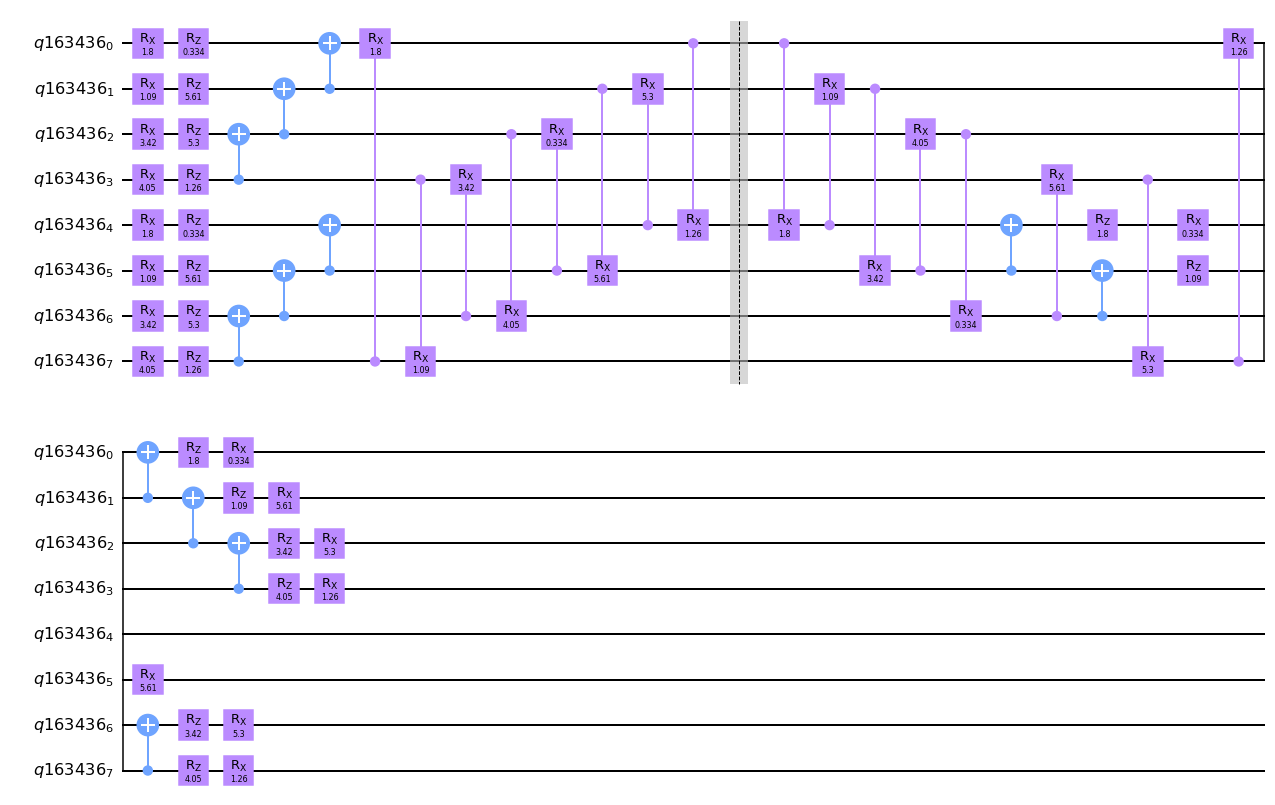

In [60]:
# visualization
theta=[]
for y in range(150):
    number = 2*pi*random()
    theta.append(number)
# currently we only support maximal four circuits
qr_circ1 = QuantumRegister(4)
qr_circ2 = QuantumRegister(4)
qr_circ3 = QuantumRegister(4)
qr_circ4 = QuantumRegister(4)
qr_reverse_circ1 = QuantumRegister(4)
qr_reverse_circ2 = QuantumRegister(4)
qr_reverse_circ3 = QuantumRegister(4)
qr_reverse_circ4 = QuantumRegister(4)

circuit_1 = QuantumCircuit(qr_circ1)
circuit_2 = QuantumCircuit(qr_circ2)
circuit_3 = QuantumCircuit(qr_circ3)
circuit_4 = QuantumCircuit(qr_circ4)
reverse_circuit_1 = QuantumCircuit(qr_reverse_circ1)
reverse_circuit_2 = QuantumCircuit(qr_reverse_circ2)
reverse_circuit_3 = QuantumCircuit(qr_reverse_circ3)
reverse_circuit_4 = QuantumCircuit(qr_reverse_circ4)

# Arrangement a
cir_width8_partition2 = generate_clustered_circuit([circuit2(circuit_1, qr_circ1, theta,1,0), circuit2(circuit_2, qr_circ2, theta,1,0)], [circuit2(reverse_circuit_1, qr_reverse_circ1, theta,0,1), circuit2(reverse_circuit_2, qr_reverse_circ2, theta,0,1)], "width8-partition2", "loop8", "crx", theta,1)

# Arrangement b
#cir_width12_partition3 = generate_clustered_circuit([circuit2(circuit_1, qr_circ1, theta,1,0), circuit3(circuit_2, qr_circ2, theta,1,0), circuit2(circuit_3, qr_circ3, theta,1,0)], [circuit2(reverse_circuit_1, qr_reverse_circ1, theta,0,1), circuit3(reverse_circuit_2, qr_reverse_circ2, theta,0,1), circuit2(reverse_circuit_3, qr_reverse_circ3, theta,0,1)], "width12-partition3", "loop12", "crx", theta,1)

# Arrangement c
#cir_width8_partition4 = generate_clustered_circuit([circuit2(circuit_1, qr_circ1, theta,1,0), circuit2(circuit_2, qr_circ2, theta,1,0), circuit2(circuit_3, qr_circ3, theta,1,0)], [circuit2(reverse_circuit_1, qr_reverse_circ1, theta,0,1), circuit2(reverse_circuit_2, qr_reverse_circ2, theta,0,1),circuit2(reverse_circuit_3, qr_reverse_circ3, theta,0,1)], "width8-partition3", "two-fan", "crx", theta,1)

# print the circuit
cir_width8_partition2.draw()
#cir_width12_partition3.draw()
#cir_width8_partition4.draw()

In [ ]:
backend = Aer.get_backend('qasm_simulator')
nshot=1024
nparam=1
if number_qubits == 12:
    nparam = 12500
fidelity=[] 
p = []
start = 0
end = 80
for x in range(nparam):
    theta_circ1=[]
    theta_circ2=[]
    theta =[]

    for y in range(150):
        number = 2*pi*random()
        theta_circ1.append(number)
    for y in range(150):
        number = 2*pi*random()
        theta_circ2.append(number)
    for y in range(150):
        number = 2*pi*random()
        theta.append(number)

    qr_circ1 = QuantumRegister(4)
    qr_circ2 = QuantumRegister(4)
    qr_circ3 = QuantumRegister(4)
    qr_circ4 = QuantumRegister(4)
    qr_reverse_circ1 = QuantumRegister(4)
    qr_reverse_circ2 = QuantumRegister(4)
    qr_reverse_circ3 = QuantumRegister(4)
    qr_reverse_circ4 = QuantumRegister(4)

    circuit_1 = QuantumCircuit(qr_circ1)
    circuit_2 = QuantumCircuit(qr_circ2)
    circuit_3 = QuantumCircuit(qr_circ3)
    circuit_4 = QuantumCircuit(qr_circ4)
    reverse_circuit_1 = QuantumCircuit(qr_reverse_circ1)
    reverse_circuit_2 = QuantumCircuit(qr_reverse_circ2)
    reverse_circuit_3 = QuantumCircuit(qr_reverse_circ3)
    reverse_circuit_4 = QuantumCircuit(qr_reverse_circ4)

    
    qc = generate_clustered_circuit([circuit2(circuit_1, qr_circ1, theta_circ1,1,0), circuit2(circuit_2, qr_circ2, theta_circ2,1,0)], [circuit2(reverse_circuit_1, qr_reverse_circ1, theta_circ1, 0, 1),circuit2(reverse_circuit_2, qr_reverse_circ2, theta_circ2,0,1)], "width8-partition2", "loop8", "crx", theta,1)
    qc.measure(qr[:], cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count = result.get_counts()
    counts_zero = "".join("0"*number_qubits)

    if counts_zero in count and '1' in count:
        #print("hier")
        ratio=count[counts_zero]/nshot
    elif counts_zero in count and '1' not in count:
        ratio=count[counts_zero]/nshot
    else:
        ratio=0
    
    fidelity.append(ratio)
qc.draw()




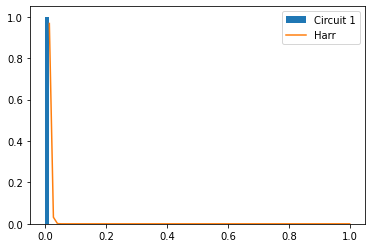

In [62]:
weights = np.ones_like(fidelity)/float(len(fidelity))
plt.hist(fidelity, bins=bins_list, weights=weights, range=[0, 1], label='Circuit 1')
plt.plot(bins_x, P_haar_hist, label='Harr')
plt.legend(loc='upper right')
plt.show()

In [63]:
# example of calculating the kl divergence (relative entropy) with scipy
P_1_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0]
kl_pq = rel_entr(P_1_hist, P_haar_hist)
print(sum(kl_pq))

0.033162527051258016


# Verschränkungsfähigkeit

In [70]:
from qiskit.quantum_info import partial_trace
def entanglement_capability(num_qubits, nparam):
    res = np.zeros(nparam, dtype=complex)
    
    for i in range(nparam):
        qr = QuantumRegister(num_qubits)
        cr = ClassicalRegister(num_qubits)
        qc = QuantumCircuit(qr, cr)
        theta_circ1=[]
        theta_circ2=[]
        theta_reverse_circ1=[]
        theta_reverse_circ2=[]
        theta =[]

        for y in range(150):
            number = 2*pi*random()
            theta_circ1.append(number)
        for y in range(150):
            number = 2*pi*random()
            theta_circ2.append(number)
        for y in range(150):
            number = 2*pi*random()
            theta_reverse_circ1.append(number)
        for y in range(150):
            number = 2*pi*random()
            theta_reverse_circ2.append(number)
        for y in range(150):
            number = 2*pi*random()
            theta.append(number)

        qr_circ1 = QuantumRegister(4)
        qr_circ2 = QuantumRegister(4)
        qr_circ3 = QuantumRegister(4)
        qr_circ4 = QuantumRegister(4)
        qr_reverse_circ1 = QuantumRegister(4)
        qr_reverse_circ2 = QuantumRegister(4)
        qr_reverse_circ3 = QuantumRegister(4)
        qr_reverse_circ4 = QuantumRegister(4)

        circuit_1 = QuantumCircuit(qr_circ1)
        circuit_2 = QuantumCircuit(qr_circ2)
        circuit_3 = QuantumCircuit(qr_circ3)
        circuit_4 = QuantumCircuit(qr_circ4)
        reverse_circuit_1 = QuantumCircuit(qr_reverse_circ1)
        reverse_circuit_2 = QuantumCircuit(qr_reverse_circ2)
        reverse_circuit_3 = QuantumCircuit(qr_reverse_circ3)
        reverse_circuit_4 = QuantumCircuit(qr_reverse_circ4)


        circuit = generate_clustered_circuit([circuit2(circuit_1, qr_circ1, theta_circ1,1,0), circuit2(circuit_2, qr_circ2, theta_circ2,1,0)], [circuit2(reverse_circuit_1, qr_reverse_circ1, theta_reverse_circ1, 0, 1),circuit2(reverse_circuit_2, qr_reverse_circ2, theta_reverse_circ2,0,1)], "width8-partition2", "loop8", "crx", theta,1)
        result = execute(circuit, backend=Aer.get_backend('statevector_simulator'), shots=1024).result()
        U = result.get_statevector(circuit, decimals=5)
        qb = list(range(num_qubits))
        entropy = 0
        
        for k in range(num_qubits):
            density = partial_trace(U, qb[:k]+qb[k+1:]).data
            trace = np.trace(density**2)
            entropy += trace
            
        entropy /= num_qubits
        res[i] = 1 - entropy
        
    return 2*np.sum(res).real/nparam

In [72]:
sample_size = 7500
if number_qubits == 12:
    sample_size = 12500
for i in range(5):
    r = entanglement_capability(number_qubits, sample_size)
    print(r)
